## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Help functions

In [2]:
def read_and_split(filename):
    # Read data
    df1 = pd.read_csv(filename)

    # Rename columns
    new_column_names = [
        'Time',  # 0th index
        'US_election',  # 1st index
        'US_election_confidence',  # 2nd index
        'ballon_or',  # 3rd index
        'ballon_or_confidence',  # 4th index
        'halloween_rain',  # 5th index
        'halloween_rain_confidence'  # 6th index
    ]
    df1.columns = new_column_names

    # Set the confidence to null values when the guess was "I don't know"
    for col in df1.columns:
        if col.endswith('_confidence'):
            df1.loc[df1[col.replace("_confidence", "")] == "I don't know", col] = np.nan

    # Split the data into 3 sub-dataframes for each experiment
    us_exp = df1[['US_election', 'US_election_confidence']]
    or_exp = df1[['ballon_or', 'ballon_or_confidence']]
    rain_exp = df1[['halloween_rain', 'halloween_rain_confidence']]

    return [us_exp, or_exp, rain_exp]


In [3]:
def compute_means(dfs):
    res = []
    for df in dfs:
        sub_res = []
        # Get the answer options
        val = df[df.columns[0]].unique()

        for el in val:
            # Create a temporary dataframe for the one answer choice
            temp_df = df[df[df.columns[0]]==el]
            # Compute the confidence mean of this dataframe
            temp_mean = temp_df[df.columns[1]].mean()
            sub_res.append((el, temp_mean))

        res.append(pd.DataFrame(sub_res))
        
    return res


In [4]:
def compute_counts(dfs):
    res = []
    for d in dfs:
        sub_res = []
        val = d[d.columns[0]].unique()
        
        total_count = len(d)  # Total number of rows in the DataFrame
        
        for el in val:
            temp_df = d[d[d.columns[0]] == el]
            # Calculate percentage count for the temporary dataframe
            count = len(temp_df)
            percentage = (count / total_count) * 100  
            sub_res.append((el, percentage))
        
        res.append(pd.DataFrame(sub_res, columns=[d.columns[0], 'percentage']))
        
    return res


In [8]:
def plot(df, plot_type="means"):
    
    names = df[df.columns[0]]
    
    # Set up bar width and positions
    bar_width = 0.35
    x = np.arange(len(names))  # Position of each name on the x-axis

    plt.figure(figsize=(10, 6))
    
    if plot_type == "means":
        title = 'Average confidence in forecast'
        # Plot means_1 and means_2 if type is 'means'
        bars1 = plt.bar(x - bar_width/2, df['means_1'], width=bar_width, label='Experiment 1', color='gold')
        bars2 = plt.bar(x + bar_width/2, df['means_2'], width=bar_width, label='Experiment 2', color='coral')
        plt.ylabel('Mean Values')
    
    elif plot_type == "counts":
        title = 'Number of forecasted vote (in %)'
        # Plot percentage_1 and percentage_2 if type is 'counts'
        bars1 = plt.bar(x - bar_width/2, df['count_percent_1'], width=bar_width, label='Experiment 1', color='purple')
        bars2 =plt.bar(x + bar_width/2, df['count_percent_2'], width=bar_width, label='Experiment 2', color='navy')
        plt.ylabel('Count Percentage (%)')
    
    # Add data values on top of the bars
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            plt.text(
                bar.get_x() + bar.get_width()/2,  # X position (center of the bar)
                height,                           # Y position (top of the bar)
                f'{height:.2f}',                  # Text to display (formatted to 2 decimals)
                ha='center', va='bottom',         # Horizontal and vertical alignment
                fontsize=10                       # Font size for text
            )
    
    # Labeling
    plt.title(title)
    plt.xlabel('Name')
    plt.xticks(ticks=x, labels=names, rotation=45, ha='right')
    plt.legend()
    
    plt.tight_layout()
    plt.show()


## Experiment analysis

### Read and compute

In [6]:
# ------ SURVEY 1 : ------
dfs_1 = read_and_split('survey1_data.csv')
means_1 = compute_means(dfs_1)
counts_1 = compute_counts(dfs_1)

# ------ SURVEY 2 : ------
dfs_2 = read_and_split('survey2_data.csv')
means_2 = compute_means(dfs_2)
counts_2 = compute_counts(dfs_2)

### Plot

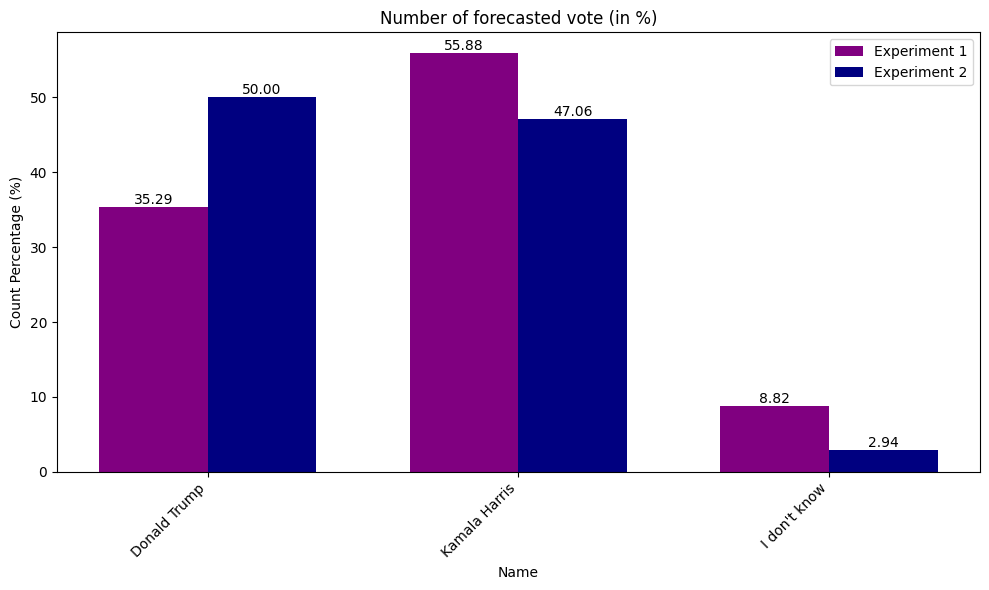

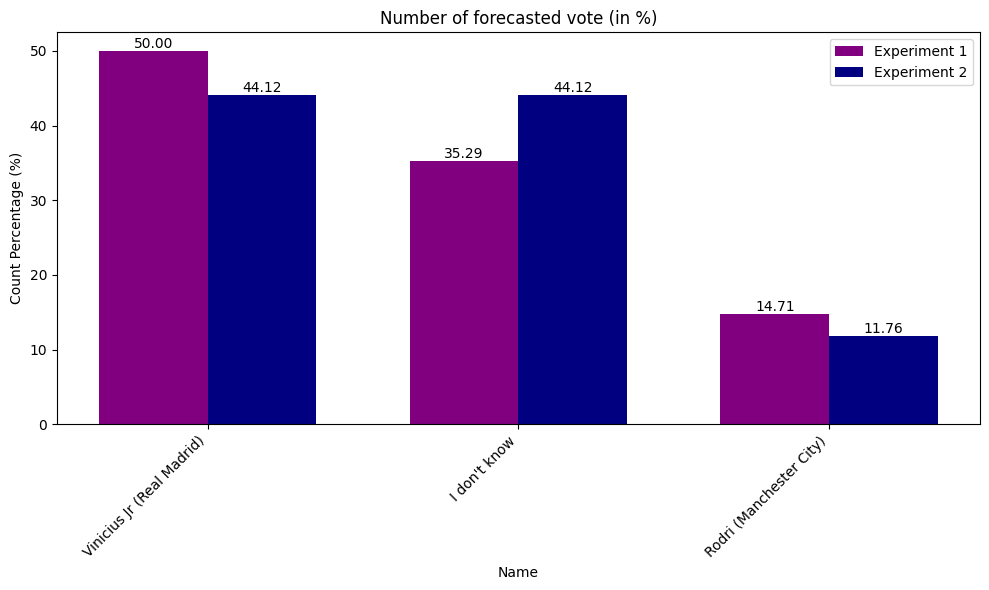

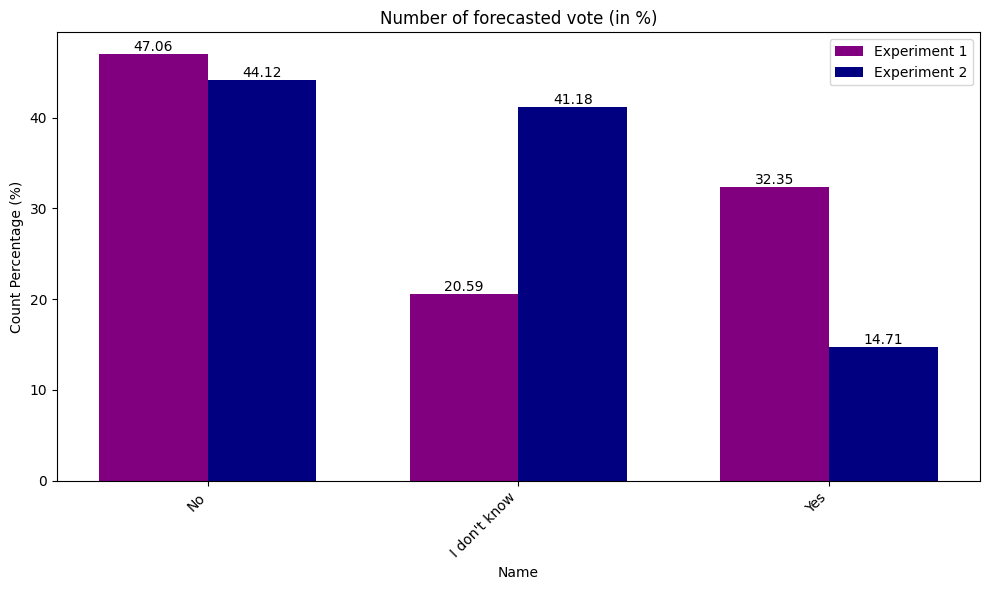

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


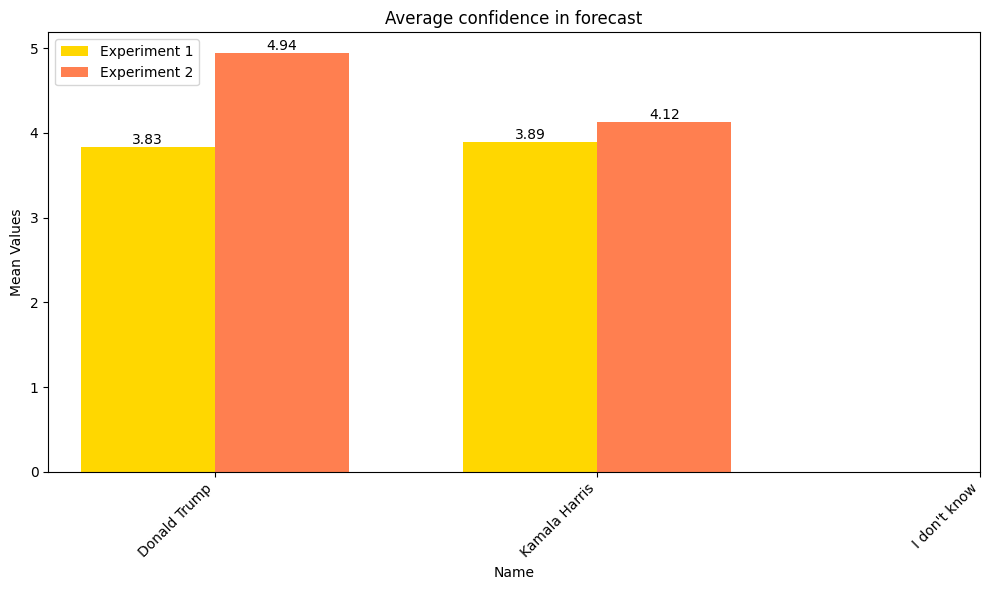

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


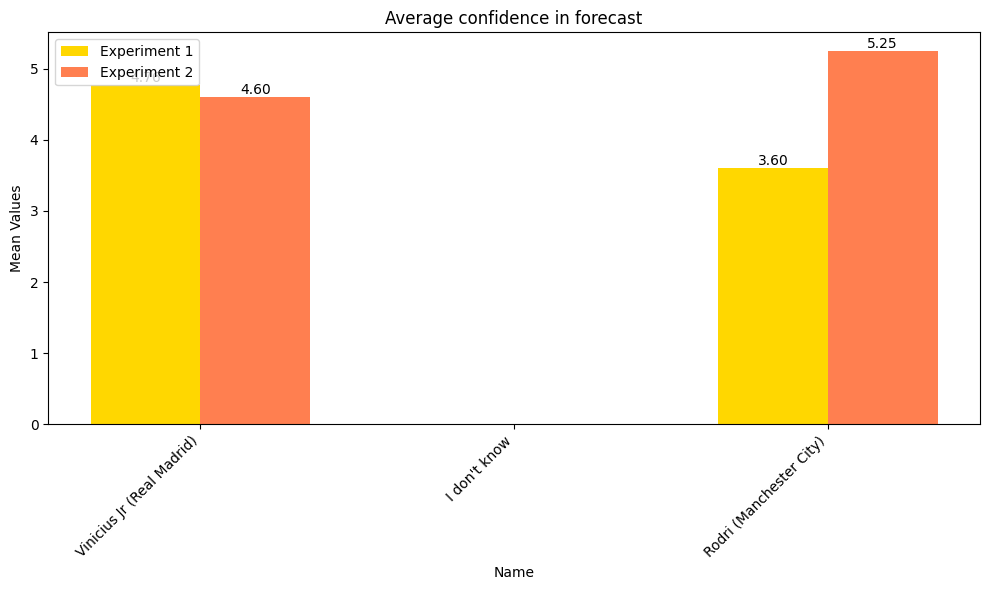

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


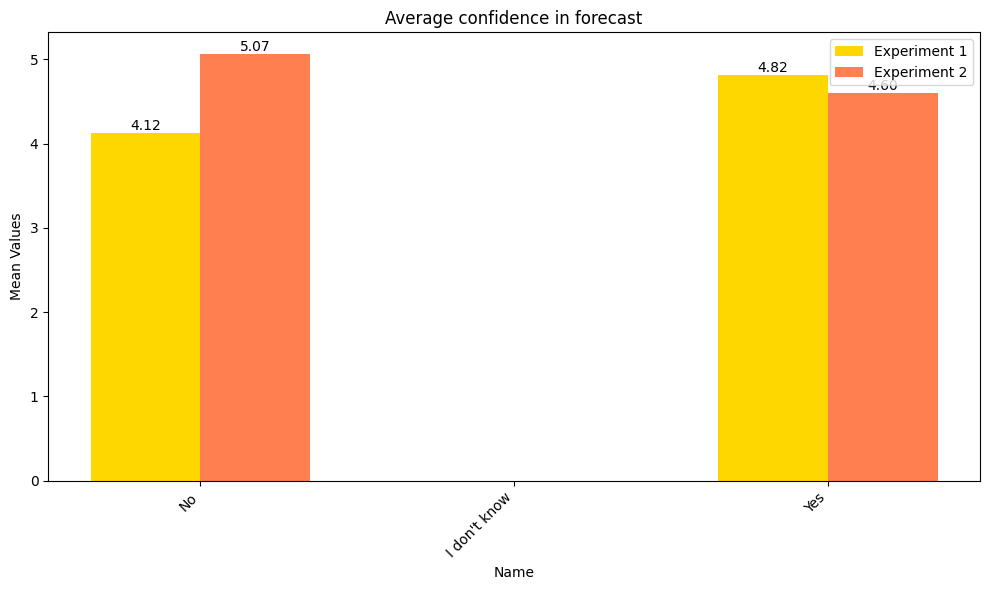

In [9]:
# ------ PLOT COUNTS : ------
for df1, df2 in zip(counts_1, counts_2):
    df1.columns = ['name', 'count_percent_1']
    df2.columns = ['name', 'count_percent_2']
    result = pd.merge(df1, df2, on='name', how='outer')
    plot(result, plot_type='counts')

# ------ PLOT MEANS : ------
for df1, df2 in zip(means_1, means_2):
    df1.columns = ['name', 'means_1']
    df2.columns = ['name', 'means_2']
    result = pd.merge(df1, df2, on='name', how='outer')
    plot(result, plot_type='means')

We choose to analyze the first two experiments (US election and Ballon d'Or), as the third experiment provides us with similar insights as for the second one. Furthermore, it seems that the answer for the second forecast mainly showed that they didn't remember the weather of Halloween's night.